# **IMPORT**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# **DATASET**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# **DATA PREPROCESSING**

In [ ]:
print("Number of columns: ",df.columns.size)
print("Column names: ", df.columns)

Number of columns:  10
Column names:  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [ ]:
#check for null values in all the columns:
print("Null values in 'satisfaction_level': ",df[['satisfaction_level']].isnull().sum())
print("Null values in 'last_evaluation': ",df[['last_evaluation']].isnull().sum())
print("Null values in 'number_project': ",df[['number_project']].isnull().sum())
print("Null values in 'average_montly_hours': ",df[['average_montly_hours']].isnull().sum())
print("Null values in 'time_spend_company': ",df[['time_spend_company']].isnull().sum())
print("Null values in 'Work_accident': ",df[['Work_accident']].isnull().sum())
print("Null values in 'left': ",df[['left']].isnull().sum())
print("Null values in 'promotion_last_5years': ",df[['promotion_last_5years']].isnull().sum())
print("Null values in 'Department': ",df[['Department']].isnull().sum())
print("Null values in 'salary': ",df[['salary']].isnull().sum())

Null values in 'satisfaction_level':  satisfaction_level    0
dtype: int64
Null values in 'last_evaluation':  last_evaluation    0
dtype: int64
Null values in 'number_project':  number_project    0
dtype: int64
Null values in 'average_montly_hours':  average_montly_hours    0
dtype: int64
Null values in 'time_spend_company':  time_spend_company    0
dtype: int64
Null values in 'Work_accident':  Work_accident    0
dtype: int64
Null values in 'left':  left    0
dtype: int64
Null values in 'promotion_last_5years':  promotion_last_5years    0
dtype: int64
Null values in 'Department':  Department    0
dtype: int64
Null values in 'salary':  salary    0
dtype: int64


# **Exploratory Data Analysis**

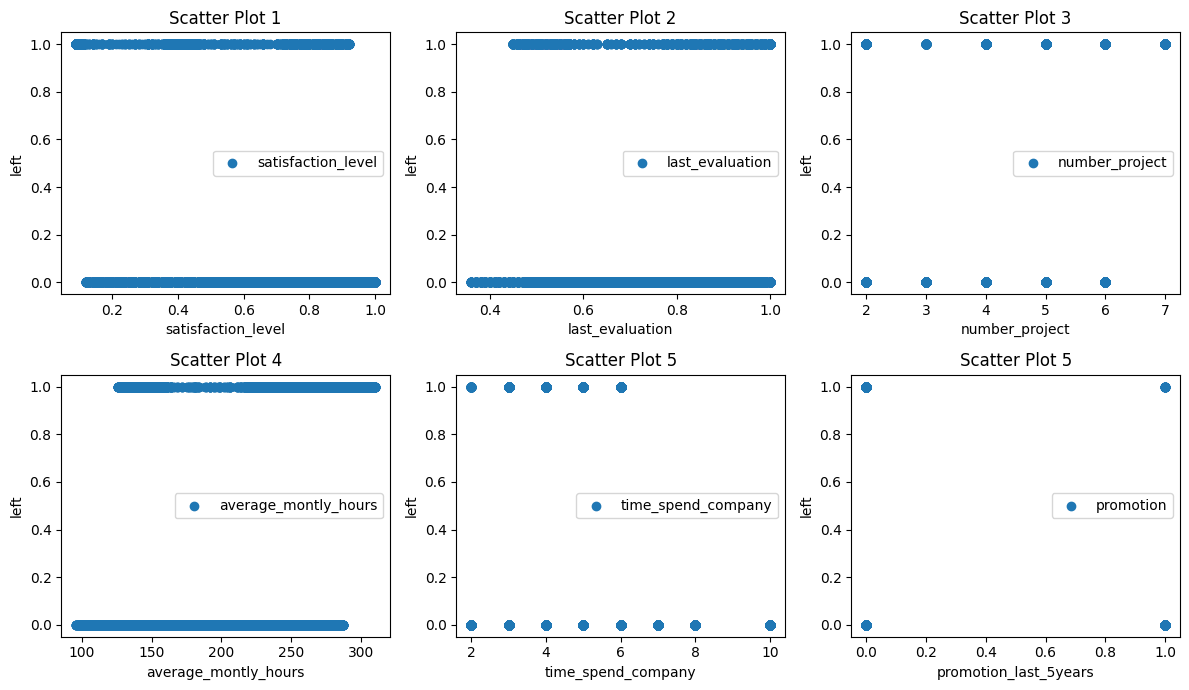

In [ ]:
import numpy as np
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))

axes = axes.flatten()

columns = df.columns


# Create scatter plots in each subplot
for i, ax in enumerate(axes[:-1]):
  ax.scatter(df[[columns[i]]], df['left'], label=columns[i])
  ax.set_title(f'Scatter Plot {i+1}')
  ax.set_xlabel(columns[i])
  ax.set_ylabel('left')
  ax.legend()


axes[-1].scatter(df[['promotion_last_5years']], df['left'], label='promotion')
axes[-1].set_title(f'Scatter Plot {i+1}')
axes[-1].set_xlabel('promotion_last_5years')
axes[-1].set_ylabel('left')
axes[-1].legend()


# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

<Axes: xlabel='salary'>

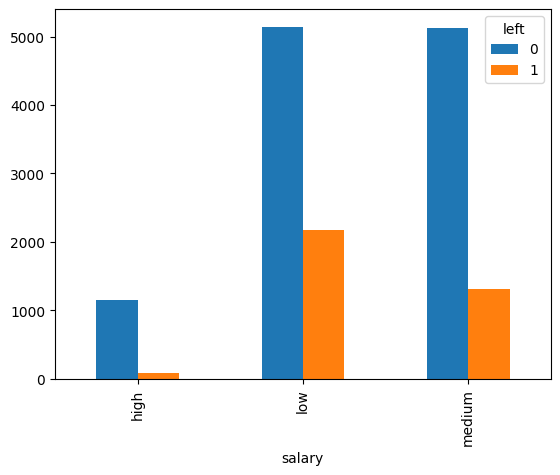

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

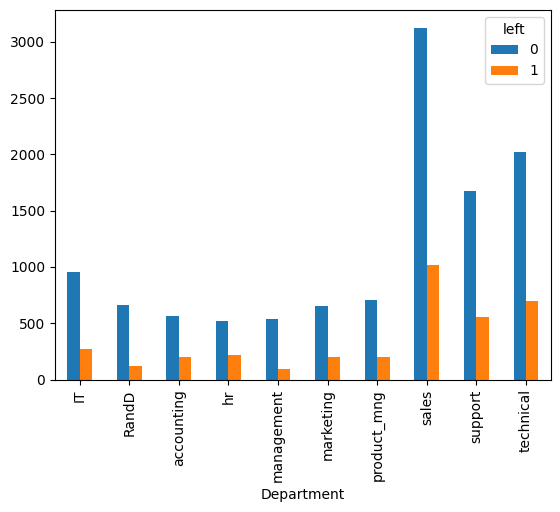

In [ ]:
pd.crosstab(df.Department, df.left).plot(kind = 'bar')

0    11428
1     3571
Name: left, dtype: int64


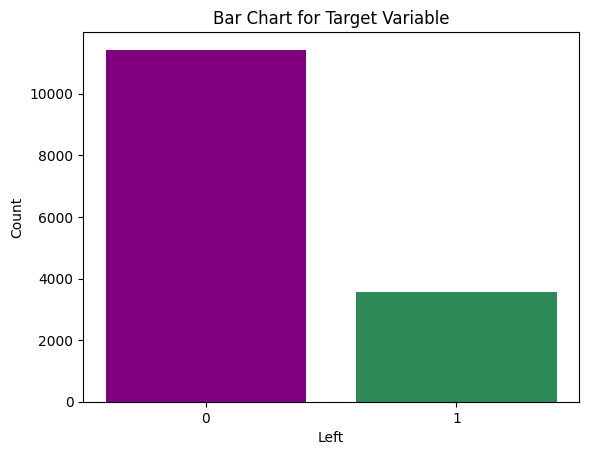

In [ ]:
# bar chart showing 'left'
left_counts = df['left'].value_counts()

print(left_counts)

plt.xticks([1,0])
plt.bar(left_counts.index, left_counts.values, color=['purple', 'seagreen'])
plt.xlabel('Left')
plt.ylabel('Count')
plt.title('Bar Chart for Target Variable')

plt.show()


**Find the average numbers of all columns so that you can select which variables to use to train the model:**


In [ ]:
df.groupby('left').mean()

<ipython-input-13-b0959f325c8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**We see from above data that we can use:
1. satisfaction_level
2. average monthly hours
3. promotion last 5 years
4. time spend in company
5. salary

# **Prepare the dataframe**

In [ ]:
new_df = df[['satisfaction_level','average_montly_hours', 'time_spend_company', 'promotion_last_5years']]
new_df.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years
0,0.38,157,3,0
1,0.80,262,6,0
2,0.11,272,4,0
3,0.72,223,5,0
4,0.37,159,3,0


In [ ]:
# get the dummy variablse for salary:
salary_dummies = pd.get_dummies(df.salary)
salary_dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [ ]:
#merge the dummies with the dataframe
merged_df = pd.concat([new_df,salary_dummies], axis = 'columns')
merged_df.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,high,low,medium
0,0.38,157,3,0,0,1,0
1,0.80,262,6,0,0,0,1
2,0.11,272,4,0,0,0,1
3,0.72,223,5,0,0,1,0
4,0.37,159,3,0,0,1,0


In [ ]:
#drop one column to avoid dummy variable trap
final_df = merged_df.drop(['medium'], axis='columns')
final_df.head()

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,high,low
0,0.38,157,3,0,0,1
1,0.80,262,6,0,0,0
2,0.11,272,4,0,0,0
3,0.72,223,5,0,0,1
4,0.37,159,3,0,0,1


# **Logistic Regression**

In [ ]:
#split the data
from sklearn.model_selection import train_test_split
X = final_df
y=df.left

X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:

lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

# **Model Accuracy**

In [ ]:
lr.score(X_test,y_test)

0.772